#  자료 구조
#### 링크드 리스트,  더블 링크드 리스트,스택, 큐,  등은  컴퓨터 사이언스에서 풀고자하는 많은 문제들을  표현하는 데 매우 유용하다. 

## 1. 링크드 리스트 (Linked List)

### 싱글 링크드 리스트(single linked list), 더블 링크드 리스트(double linked list) 는 다음과 같은 자료 구조를 말한다. 
![Altext](linked_list.png)

####  링크드 리스트,  더블 링크드 리스트, 스택, 큐 등의 자료 구조 구현을 위해,  다음 그림과 같은 Node 객체를 고려해보자.  
이때 Node 객체는 데이터를 포함하며, 이전 Node와 다음 Node 간의 연결을 제공한다. 

![Altext](./node.png)

In [1]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None
        self.previous = None \
        
    def __call__(self):
        return str(self.data)    

In [2]:
n1 = Node('eggs')
n2 = Node('ham')
n3 = Node('spam')
n1.next=n2
n2.next=n3

In [3]:
current = n1
while current:
    print(current()) ## () call the __call__ method
    current = current.next

eggs
ham
spam


## (Single) Linked List

### 아래는 싱글 링크드 리스트를 구현한 클래스이다.

In [4]:
class SinglyLinkedList:
    def __init__(self):
        self.head = None
        self.size = 0
        
    def append(self, data):
        node = Node(data) # Encapsulate the data in a Node
        if self.head == None :
            self.head = node
        else : 
            current = self.head
            while current.next :
                current = current.next
            current.next = node
        self.size +=1    
            
    def iter(self):
        current = self.head
        while current:
            yield current() # () called __call__ method
            current = current.next
            
    def delete(self, data):
        prev = self.head
        current = self.head
        while current:
            if current.data == data :
                if current == self.head :
                    self.head = current.next
                else:
                    prev.next = current.next
                self.size -= 1
                return
            prev = current
            current = current.next      
            
    def search(self, data):
        for node in self.iter():
            if data == node:
                return True
        return False         
    
    def clear(self):
        """ Clear the entire list. """
        self.head = None
        self.tail = None
        

### 위에서 만든 링크드 리스트의 멤버 함수를 사용해보자.

### 1. Delete from linked list

![Altext](./delete.png)

In [5]:
wordlist = ['eggs', 'ham', 'spam', 'cheese', 'hotdog', 'cheese']
words = SinglyLinkedList()
for word in wordlist :
    # Add word to linked list
    words.append(word)
    print("Add", word, ":", [node for node in words.iter()])
    
print("Linked List Size :", words.size)
words.delete('cheese')
print("Delete 'cheese' from Linked List, After list size :", words.size)

Add eggs : ['eggs']
Add ham : ['eggs', 'ham']
Add spam : ['eggs', 'ham', 'spam']
Add cheese : ['eggs', 'ham', 'spam', 'cheese']
Add hotdog : ['eggs', 'ham', 'spam', 'cheese', 'hotdog']
Add cheese : ['eggs', 'ham', 'spam', 'cheese', 'hotdog', 'cheese']
Linked List Size : 6
Delete 'cheese' from Linked List, After list size : 5


In [6]:
current = words.head
while current:
    print(current.data)
    current = current.next

eggs
ham
spam
hotdog
cheese


In [7]:
for word in words.iter():
    print(word)

eggs
ham
spam
hotdog
cheese


In [8]:
print(words.search('spam'))
print(words.search('cheese'))

True
True


In [9]:
words.clear()
print(words.head)

None


<br/><br/>

##  2. 스택(stack) 
### 스택은 데이터 아이템을 저장하는 자료구조로,  가장 나중에 입력된 아이템이 먼저 뽑혀서 사용되는 자료구조이다. 
#### 즉 LIFO(Last In First Out) 의  자료 구조이다. 

<br/>

### 파이썬에서는 "리스트(list)"를 이용하여 스택을 쉽게 구현할 수 있다.  

보통 스택에 자료를 입력하는 오퍼레이션 명으로 "push(data)",  맨 나중에 입력된  데이터 아이템을 뽑아 내는 데 사용되는 오퍼레이션명으로  "pop()"라는 함수명을 주로 사용한다.  

### 파이썬 리스트는 "pop()" 이라는 함수가 지원되며,  "push(data)" 대신에 "append(data)" 라는 함수가 지원된다. 

만약 "pop()"에 인자로 아이템의 인덱스를 사용하면, 리스트의 해당 인덱스의 데이터 아이템을 뽑아 낼 수가 있다.   


In [10]:
stack= list()
stack.append("alpha")
stack.append("beta")
stack.append("gamma")
stack.append("delta")
stack.append("epsilon")
print("현재 스택 내용;", stack)
print("현재 스택에서 마지막 데이터 아이템;",stack[len(stack)-1])
print("현재 스택에서 pop()한 결과로 뽑아낸 데이터 아이템;",stack.pop())
print("pop()한 후의 현재 스택 내용;", stack)

현재 스택 내용; ['alpha', 'beta', 'gamma', 'delta', 'epsilon']
현재 스택에서 마지막 데이터 아이템; epsilon
현재 스택에서 pop()한 결과로 뽑아낸 데이터 아이템; epsilon
pop()한 후의 현재 스택 내용; ['alpha', 'beta', 'gamma', 'delta']


### 파이썬의 리스트(list)를 이용한 스택 클래스 구현은 다음과 같다.

In [11]:
class List_Stack:
    def __init__(self):
        self.data=list()
        self.size =0
        
    def push(self,item):
        self.data.append(item)
        self.size +=1
        
    def pop(self):
        if self.size==0:
            return print("스택은 비어 있습니다.")
        else: 
            self.size -=1
            return self.data.pop()
        
    def peek(self, index):
        if index >= self.size:
            return print("현 스택 크기보다 큰 인덱스입니다. ")
        else: 
            return self.data[index]    

In [12]:
lstack= List_Stack()
print("현재 스택에서 pop()한 결과로 뽑아낸 데이터 아이템;", lstack.pop())

lstack.push("alpha")
lstack.push("beta")
lstack.push("gamma")
lstack.push("delta")
lstack.push("epsilon")
print("현재 스택 데이터 아이템 갯수 :", lstack.size)
print("현재 스택 내용 :", lstack.data)
print("현재 스택에서 마지막 데이터 아이템 :", lstack.peek(lstack.size-1))
print("현재 스택에서 pop()한 결과로 뽑아낸 데이터 아이템 :", lstack.pop())
print("현재 스택 데이터 아이템 갯수 :", lstack.size)
print("pop()한 후의 현재 스택 내용 :", lstack.data)

스택은 비어 있습니다.
현재 스택에서 pop()한 결과로 뽑아낸 데이터 아이템; None
현재 스택 데이터 아이템 갯수 : 5
현재 스택 내용 : ['alpha', 'beta', 'gamma', 'delta', 'epsilon']
현재 스택에서 마지막 데이터 아이템 : epsilon
현재 스택에서 pop()한 결과로 뽑아낸 데이터 아이템 : epsilon
현재 스택 데이터 아이템 갯수 : 4
pop()한 후의 현재 스택 내용 : ['alpha', 'beta', 'gamma', 'delta']


### Node 를 이용한 스택 클래스 구현은 다음과 같다. 

In [13]:
class Node_Stack:
    def __init__(self):
        self.top = None
        self.size = 0
    
    def push(self, data):
        node = Node(data)
        if self.top : node.next = self.top
        self.top = node
        self.size += 1    
    
    def pop(self):
        if self.top:
            data = self.top.data
            self.top = self.top.next
            self.size -= 1
            return data
        else:
            return print("현재 스택은 비어 있습니다.")
    
    def peek(self, index):
        if index >= self.size:
            return print("현 스택 크기보다 큰 인덱스입니다. ")
        else:
            search_node=self.top
            for i in range(index):
                search_node = search_node.next
            return search_node.data         
    
    def iter(self):
        current = self.top
        while current:
            yield current() # () called __call__ method
            current = current.next

In [14]:
nstack= Node_Stack()
print("현재 스택에서 pop()한 결과로 뽑아낸 데이터 아이템 :", nstack.pop())

nstack.push("alpha")
nstack.push("beta")
nstack.push("gamma")
nstack.push("delta")
nstack.push("epsilon")
print("현재 스택 데이터 아이템 갯수 :", nstack.size)
print("현재 스택 내용 :", [n for n in nstack.iter()])
print("현재 스택에서 마지막 데이터 아이템 :", nstack.peek(nstack.size-1))
print("현재 스택에서 pop()한 결과로 뽑아낸 데이터 아이템 :", nstack.pop())
print("현재 스택 데이터 아이템 갯수 :", nstack.size)
print("pop()한 후의 현재 스택 내용 :", [n for n in nstack.iter()])

현재 스택은 비어 있습니다.
현재 스택에서 pop()한 결과로 뽑아낸 데이터 아이템 : None
현재 스택 데이터 아이템 갯수 : 5
현재 스택 내용 : ['epsilon', 'delta', 'gamma', 'beta', 'alpha']
현재 스택에서 마지막 데이터 아이템 : alpha
현재 스택에서 pop()한 결과로 뽑아낸 데이터 아이템 : epsilon
현재 스택 데이터 아이템 갯수 : 4
pop()한 후의 현재 스택 내용 : ['delta', 'gamma', 'beta', 'alpha']


In [15]:
print([node for node in nstack.iter()])
print(nstack.peek(2))

['delta', 'gamma', 'beta', 'alpha']
beta


<br/><br/>

## 3. 큐(queue)
### 큐는 데이터 아이템을 저장하는 자료구조로,  가장 처음에 입력된 데이터 아이템이 먼저 뽑혀서 사용된다.
#### 즉 FIFO(First In First Out) 의  자료 구조이다. 
###  파이썬에서는 "list"  을 이용하여 큐를 쉽게 구현할 수있다.  
큐에 자료를 입력할 때,  "enqueue(data)",  맨 처음에 입력된  데이터 아이템을 뽑아 내는 데 사용되는 오퍼레이션명으로  "dequeue()"라는 함수명을 주로 사용한다. 
#### 파이썬에서 큐를 리스트를 이용해서 구현하는 경우에, "enqueue(data)" 는 "append(data)" 로, "dequeue()" 는 "pop(0)" 으로 구현하면 된다. 

In [16]:
queue = list()
queue.append("alpha")
queue.append("beta")
queue.append("gamma")
queue.append("delta")
queue.append("epsilon")
print("현재 큐 내용;", queue)
print("현재 큐에서 dequeue()한 결과로 출력된 데이터 아이템;", queue.pop(0))
print("dequeue()한 후의 현재 큐 내용;", queue)


현재 큐 내용; ['alpha', 'beta', 'gamma', 'delta', 'epsilon']
현재 큐에서 dequeue()한 결과로 출력된 데이터 아이템; alpha
dequeue()한 후의 현재 큐 내용; ['beta', 'gamma', 'delta', 'epsilon']


### list 를 이용한 큐 클래스 구현은 다음과 같다.

In [17]:
class List_Queue:
    def __init__(self):
        self.data=list()  
        self.size =0
        
    def enqueue(self,item):
        self.data.append(item)
        self.size +=1
        
    def dequeue(self):
        if self.size==0:
            return print("큐는 비어 있습니다.")
        else: 
            self.size -=1
            return self.data.pop(0)
        
    def peek(self, index):
        if index >= self.size:
            return print("현 스택 크기보다 큰 인덱스입니다. ")
        else: 
            return self.data[index]    

In [18]:
lqueue = List_Queue()
print("현재 큐에서 dequeue()한 결과로 출력된 데이터;", lqueue.dequeue())

lqueue.enqueue("alpha")
lqueue.enqueue("beta")
lqueue.enqueue("gamma")
lqueue.enqueue("delta")
lqueue.enqueue("epsilon")
print("현재 큐 데이터 아이템 갯수;", lqueue.size)
print("현재 큐 내용;", lqueue.data)
print("현재 큐에서 맨처음 입력된 데이터 아이템;", lqueue.peek(0))
print("현재 큐에서 deque()한 결과로 출력된 데이터;", lqueue.dequeue())
print("현재 큐 데이터 아이템 갯수;", lqueue.size)
print("dequeue()한 후의 현재 큐 내용;", lqueue.data)


큐는 비어 있습니다.
현재 큐에서 dequeue()한 결과로 출력된 데이터; None
현재 큐 데이터 아이템 갯수; 5
현재 큐 내용; ['alpha', 'beta', 'gamma', 'delta', 'epsilon']
현재 큐에서 맨처음 입력된 데이터 아이템; alpha
현재 큐에서 deque()한 결과로 출력된 데이터; alpha
현재 큐 데이터 아이템 갯수; 4
dequeue()한 후의 현재 큐 내용; ['beta', 'gamma', 'delta', 'epsilon']


### Node 를 이용한 스택 클래스 구현은 다음과 같다. 

In [19]:
class Node_Queue:
    def __init__(self):
        self.head = None  
        self.size = 0
        
    def enqueue(self, data):
        node = Node(data)
        if self.head:
            current = self.head
            while current.next:
                current = current.next
            current.next = node    
        else:
            self.head = node
        self.size += 1 
              
    def dequeue(self):
        if self.head: 
            data=self.head.data
            if self.head.next:
                self.head=self.head.next
            else:
                self.head= None
            self.size -=1    
            return data
        else: 
            return print("큐는 비어 있습니다.")
 
    def peek(self, index):
        if index > self.size:
            return print("현 큐 크기보다 큰 인덱스입니다. ")
        else: 
            serach_node=Node()
            search_node=self.head
            for i in range(index):
                search_node=search_node.next
        return search_node.data
    
    def iter(self):
        current = self.head
        while current:
            yield current() # () called __call__ method
            current = current.next

In [20]:
nqueue = Node_Queue()
print("현재 큐에서 deque()한 결과로 출력된 데이터;", nqueue.dequeue())
nqueue.enqueue("alpha")
nqueue.enqueue("beta")
nqueue.enqueue("gamma")
nqueue.enqueue("delta")
nqueue.enqueue("epsilon")
print("현재 큐 데이터 아이템 갯수;", nqueue.size)
print("현재 큐 내용;", [n for n in nqueue.iter()])
print("현재 큐에서 맨처음 입력된 데이터 아이템;", nqueue.peek(0))
print("현재 큐에서 deque()한 결과로 출력된 데이터;", nqueue.dequeue())
print("현재 큐 데이터 아이템 갯수;", nqueue.size)
print("dequeue()한 후의 현재 큐 내용;", [n for n in nqueue.iter()])

큐는 비어 있습니다.
현재 큐에서 deque()한 결과로 출력된 데이터; None
현재 큐 데이터 아이템 갯수; 5
현재 큐 내용; ['alpha', 'beta', 'gamma', 'delta', 'epsilon']
현재 큐에서 맨처음 입력된 데이터 아이템; alpha
현재 큐에서 deque()한 결과로 출력된 데이터; alpha
현재 큐 데이터 아이템 갯수; 4
dequeue()한 후의 현재 큐 내용; ['beta', 'gamma', 'delta', 'epsilon']


<br/><br/>

## 4. Priority Queue
### 우선순위 큐는 보관된 아이템들에 우선순위가 연관되어 있는 자료 구조이다. 

우선 순위가 가장 높은 자료 아이템 (data)이 가장 먼저 꺼내질 수 있도록 지원된다. 우선순위 큐는 보통 힙 이라는 자료 구조를 이용하여 구현된다. 파이썬의 경우에는 "heapq"라는 내장(built-in) 모듈로 제공이 되기 때문에, 추가적인 연산이 필요 없다면 내장 모듈을 사용하는게 좋다.

### 파이썬에서는 heapq.heappush를 사용해 우선 순위 큐를 쉽게 생성할 수 있다. 
#### 첫번째 인자는 heap 자체인 list이고, 두번째 인자는 튜플인데 튜플의 첫번째 요소는 우선순위 값, 두번째 요소는 데이터를 넣어주면 된다.

함수의 두번째 인자로 튜플이 아닌 일반 값을 넣어주면, 값을 기준으로 heap을 만들어준다. 파이썬이 제공하는 힙은 최소힙(min-heap)이므로 주의하자. 

### 삽입별 시간 복잡도는 O(log n) 이다. 다음 예제를 보자.


In [21]:
import heapq
h = []
heapq.heappush(h, (3, "Go to home"))
heapq.heappush(h, (10, "Do not study"))
heapq.heappush(h, (1, "Enjoy!"))
heapq.heappush(h, (4, "Eat!"))
heapq.heappush(h, (7, "Pray!"))
print(h)

[(1, 'Enjoy!'), (4, 'Eat!'), (3, 'Go to home'), (10, 'Do not study'), (7, 'Pray!')]


### 결과는 배열로 구현된 힙을 보여준다.
### 이제  데이터 아이템(원소) 꺼내기는 heapq.heappop 으로 구현하면 된다. 각 꺼내기 별 시간 복잡도는 O(log n)이다.


In [22]:
first = heapq.heappop(h)
second = heapq.heappop(h)
third = heapq.heappop(h)
print("first:", first)
print("second:", second)
print("third:", third)

first: (1, 'Enjoy!')
second: (3, 'Go to home')
third: (4, 'Eat!')


<br/><br/>

## 5. Minimum Spanning Tree

<h3 style="line-height:1.4em"> 최소 신장 트리(Minimum Spanning Tree) 란 사이클(cycle)을 생성하지 않고 모든 정점을 연결하되, 모든 에지의 가중치 값(거리값)이 최소인 트리를 말한다.</h3>

이제, [그림 1]과 같이 에지에 웨이트(거리)를 갖는 그래프에 대해 경로 찾는 문제의 경우에 자료 구조 표현, 알고리즘등을 살펴 보기로 한다.¶
![Altext](./graph.png)

In [23]:
graph = {'S': [['B', 175], ['L', 125], ['N', 320]],
         'B': [['F', 245], ['L', 115], ['N', 145], ['S', 175]],
         'L': [['B', 115], ['E', 645], ['F', 220], ['N', 260], ['S', 125]],
         'N': [['B', 145], ['F', 385], ['L', 260], ['S', 320]],
         'E': [['F', 450], ['L', 645]],
         'F': [['B', 245], ['E', 450], ['N', 385]]}

## (1) Prim's MST Algorithm
### Prim's MST Algorithm 을 우선순위 큐를 이용하여 파이썬 프로그래밍하여 보자.
![Altext](./prim.png)

### 위에서 소개한 프림 알고리즘을 파이썬 함수로 구현하고 실행해본다.

In [24]:
from heapq import *

def prim(G) :
    # make priority queue
    pq = []
    for A in G : 
        for B in G[A] :
            heappush(pq, (B[1], (A, B[0])))
    
    # T : MST, V : MST vertice
    T = []
    V = set()
    
    # Get minimum-weight edge
    heappush(T, heappop(pq))
    V.update([ v for v in T[0][1] ])
    for i in range(len(G)-2) :
        # an edge of minimum weight incident to a vertex in T
        e = []
        while True :
            e.insert(0, heappop(pq))
            if e[0][1][0] in V and e[0][1][1] in V :
                e.pop(0) # prohibit cycle
            elif not e[0][1][0] in V and not e[0][1][1] in V : 
                pass # the e not exist in T
            else : 
                for i in range(1, len(e)) : heappush(pq, e[i])
                break
        # T with e added
        T.append(e[0])
        V.update([ v for v in e[0][1] ])
    return T

In [25]:
prim(graph)

[(115, ('B', 'L')),
 (125, ('L', 'S')),
 (145, ('B', 'N')),
 (220, ('L', 'F')),
 (450, ('E', 'F'))]

<br/>

### 아래 [그림2]의 그래프에서도 MST가 만들어지는지 prim algorithm을 적용한다.

![Altext](./prim_ex.png)

In [26]:
PG= {'A': [['B', 4], ['D', 1]],
     'B': [['A', 4], ['C', 4], ['D', 4], ['J', 10]],
     'C': [['B', 4], ['E', 2], ['F', 1]],
     'D': [['A', 1], ['B', 4], ['H', 5], ['J', 6]],
     'E': [['C', 2], ['G', 2]],
     'F': [['C', 1], ['G', 3], ['I', 5]],
     'G': [['E', 2], ['F', 3], ['I', 3], ['J', 4]],
     'H': [['D', 5], ['J', 2]],  
     'I': [['F', 5], ['G', 3],['J', 3]],
     'J': [['B', 10], ['D', 6],['G', 4], ['H', 2], ['I', 3]]}

In [27]:
prim(PG)

[(1, ('A', 'D')),
 (4, ('A', 'B')),
 (4, ('B', 'C')),
 (1, ('C', 'F')),
 (2, ('C', 'E')),
 (2, ('E', 'G')),
 (3, ('G', 'I')),
 (3, ('I', 'J')),
 (2, ('H', 'J'))]

![Altext](./prim_ex_sol.png)

<br/><br/>

## (2) Kruskal's MST Algorithm

### Kruskal's MST Algorithm 을 우선순위 큐를 이용하여 파이썬 프로그래밍하여 보자.
![Altext](./krusal.png)


In [28]:
KG= {'A': [['B', 4], ['D', 1]],
     'B': [['A', 4], ['C', 4], ['D', 4], ['J', 10]],
     'C': [['B', 4], ['E', 2], ['F', 1]],
     'D': [['A', 1], ['B', 4], ['H', 5], ['J', 6]],
     'E': [['C', 2], ['G', 2]],
     'F': [['C', 1], ['G', 3], ['I', 5]],
     'G': [['E', 2], ['F', 3], ['I', 3], ['J', 4]],
     'H': [['D', 5], ['J', 2]],  
     'I': [['F', 5], ['G', 3],['J', 3]],
     'J': [['B', 10], ['D', 6],['G', 4], ['H', 2], ['I', 3]]}

In [29]:
from heapq import *
def kruskal(G) :
    # make priority queue
    pq = []
    for A in G : 
        for B in G[A] :
            heappush(pq, (B[1], (A, B[0])))
    
    # T : MST, VG : MST Vertice Groups
    T = []
    VG = []
    
    for i in range(len(G)-1) :
        # any edge in G with smallest weight that does not form a simple circuit when add to T.
        isAdd = False # Check if edge has been added or not.
        V = set([])
        for group in VG : 
            V = V.union(group)
        while not isAdd :
            e = heappop(pq)
            if (not e[1][0] in V) and (not e[1][1] in V) :
                # T with e added
                T.append(e)
                VG.append(set([e[1][0], e[1][1]])) # Make new vertice group
                isAdd = True
                continue
            for group in VG :
                if (e[1][0] in group) != (e[1][1] in group) :
                    # T with e added
                    T.append(e)
                    group.update(e[1])
                    isAdd = True
                    break
                if (e[1][0] in group) and (e[1][1] in group) :
                    isAdd = False
                    break
    return T

In [30]:
kruskal(KG)

[(1, ('A', 'D')),
 (1, ('C', 'F')),
 (2, ('C', 'E')),
 (2, ('E', 'G')),
 (2, ('H', 'J')),
 (3, ('G', 'I')),
 (3, ('I', 'J')),
 (4, ('A', 'B')),
 (4, ('B', 'C'))]

### Kruskal's MST Algorithm은 아래와 같이 우선순위 큐를 사용하지 않고도, 간단히 구현할 수도 있다.

In [31]:
def naive_find(C, u): # Find component rep.
    while C[u] != u: # Rep. would point to itself
        u = C[u]
    return u

def naive_union(C, u, v):
    u = naive_find(C, u) # Find both reps
    v = naive_find(C, v)
    C[u] = v # Make one refer to the other

In [32]:
def naive_kruskal(G):
    E = [(w,u,v) for u in G for v, w in G[u]]    
    T = set() # Empty partial solution
    C = {u:u for u in G} # Component reps
    for _, u, v in sorted(E): # Edges, sorted by weight
        if naive_find(C, u) != naive_find(C, v):
            T.add((u, v)) # Different reps? Use it!
            naive_union(C, u, v) # Combine components
    return T

In [33]:
naive_kruskal(KG)

{('A', 'B'),
 ('A', 'D'),
 ('B', 'C'),
 ('C', 'E'),
 ('C', 'F'),
 ('E', 'G'),
 ('G', 'I'),
 ('H', 'J'),
 ('I', 'J')}

In [34]:
def find(C, u):
    if C[u] != u:
        C[u] = find(C, C[u]) # Path compression
    return C[u]

def union(C, R, u, v):
    u, v = find(C, u), find(C, v)
    if R[u] > R[v]: # Union by rank
        C[v] = u
    else:
        C[u] = v
    if R[u] == R[v]: # A tie: Move v up a level
        R[v] += 1

In [35]:
def kruskal(G):
    E = [(w,u,v) for u in G for v, w in G[u]]
    T = set()
    C, R = {u:u for u in G}, {u:0 for u in G} # Comp. reps and ranks
    for _, u, v in sorted(E):
        if find(C, u) != find(C, v):
            T.add((u, v))        
            union(C, R, u, v)
    return T

In [36]:
kruskal(KG)

{('A', 'B'),
 ('A', 'D'),
 ('B', 'C'),
 ('C', 'E'),
 ('C', 'F'),
 ('E', 'G'),
 ('G', 'I'),
 ('H', 'J'),
 ('I', 'J')}

<br/><br/><br/><br/>
<h3 style='text-align:center;'>주의, 본 이론 파일이 아니라 14주실습(문제) 파일을 풀어서 제출해주세요.</h3>

<br/><br/><br/><br/>
<h1 style='text-align:center;'>실습 문제</h1>
<br/><br/>

### 아래는 카카오맵으로 본 학교의 일부 모습이다.
카카오맵 URL (https://map.kakao.com/)

![kakaomap1](kakaomap1.png)

#### 주요 건물을 노드(정점)로, 건물과 건물 사이의 길을 에지로 표현하고, 에지의 가중치값을 이동시간이라고 했을 때 그래프는 아래와 같이 만들어진다.



![kakaomap2](kakaomap2.png)

## 실습 1
####  위 그래프를  아래 draw_graph 함수를 사용하여 표현하시오. 단, 노드 위치는 마음대로 해도 된다.

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
def draw_graph(graph, pos=None) :
    if pos == None : pos=nx.spring_layout(graph)
    plt.figure(figsize=(12, 10))
    nx.draw_networkx_nodes(graph, pos=pos, node_size=4000, node_color='cyan')
    nx.draw_networkx_edges(graph, pos=pos)
    nx.draw_networkx_labels(graph, pos=pos, font_size=10, font_family=font_name)
    edge_labels = {(u, v): d['weight'] for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=edge_labels, font_size=20, rotate=False)
    plt.show()

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 1200x1000 with 1 Axes>

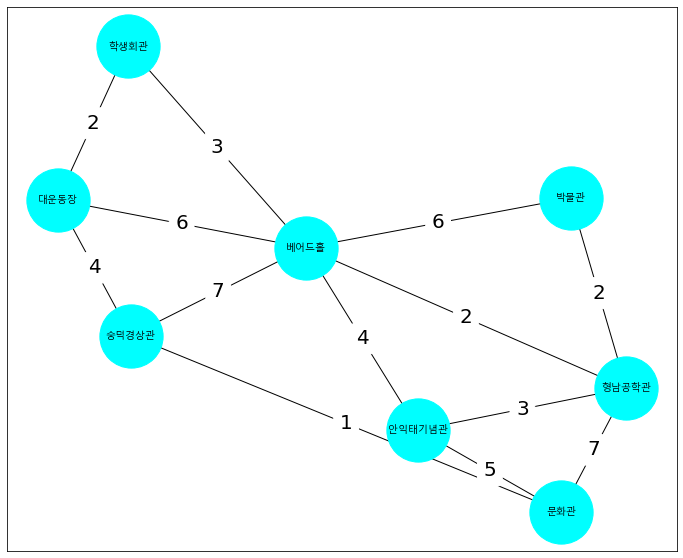

In [38]:
G= nx.Graph()
G.add_weighted_edges_from([('문화관','숭덕경상관',1),('숭덕경상관','대운동장',4),('대운동장','학생회관',2),('숭덕경상관','베어드홀',7),('대운동장','베어드홀',6),('학생회관','베어드홀',3),('문화관','안익태기념관',5),('문화관','형남공학관',7),('베어드홀','안익태기념관',4),('베어드홀','형남공학관',2),('베어드홀','박물관',6),('안익태기념관','형남공학관',3),('형남공학관','박물관',2)])
draw_graph(G)

## 실습 2

#### 위에서 만든 그래프에서 Prim's MST Algorithm을 이용해 최소 신장 트리 (Minimum Spanning Tree)를 구하시오.

In [39]:
from heapq import *
def prim(G) :
    # make priority queue
    pq = []
    for A in G : 
        for B in G[A] :
            heappush(pq, (B[1], (A, B[0])))
    
    # T : MST, V : MST vertice
    T = []
    V = set()
    
    # Get minimum-weight edge
    heappush(T, heappop(pq))
    V.update([ v for v in T[0][1] ])
    for i in range(len(G)-2) :
        # an edge of minimum weight incident to a vertex in T
        e = []
        while True :
            e.insert(0, heappop(pq))
            if e[0][1][0] in V and e[0][1][1] in V :
                e.pop(0) # prohibit cycle
            elif not e[0][1][0] in V and not e[0][1][1] in V : 
                pass # the e not exist in T
            else : 
                for i in range(1, len(e)) : heappush(pq, e[i])
                break
        # T with e added
        T.append(e[0])
        V.update([ v for v in e[0][1] ])
    return T

map = {'문화관': [['숭덕경상관',1],['안익태기념관',5],['형남공학관',7]],
        '숭덕경상관': [['문화관',1],['대운동장',4],['베어드홀',7]],
        '대운동장': [['숭덕경상관',4],['베어드홀',6],['학생회관',2]],
        '학생회관':[['대운동장',2],['베어드홀',3]],
        '베어드홀':[['숭덕경상관',7],['대운동장',6],['학생회관',3],['안익태기념관',4],['형남공학관',2],['박물관',6]],
        '안익태기념관':[['문화관',5],['베어드홀',4],['형남공학관',3]],
        '형남공학관':[['안익태기념관',3],['베어드홀',2],['박물관',2]],
        '박물관':[['베어드홀',6],['형남공학관',2]]}
prim(map)

[(1, ('문화관', '숭덕경상관')),
 (4, ('대운동장', '숭덕경상관')),
 (2, ('대운동장', '학생회관')),
 (3, ('베어드홀', '학생회관')),
 (2, ('베어드홀', '형남공학관')),
 (2, ('박물관', '형남공학관')),
 (3, ('안익태기념관', '형남공학관'))]

## 실습 3

#### 위에서 만든 그래프에서 Kruskal's MST Algorithm을 이용해 최소 신장 트리 (Minimum Spanning Tree)를 구하시오.

In [40]:
from heapq import *
def kruskal(G) :
    # make priority queue
    pq = []
    for A in G : 
        for B in G[A] :
            heappush(pq, (B[1], (A, B[0])))
    
    # T : MST, VG : MST Vertice Groups
    T = []
    VG = []
    
    for i in range(len(G)-1) :
        # any edge in G with smallest weight that does not form a simple circuit when add to T.
        isAdd = False # Check if edge has been added or not.
        V = set([])
        for group in VG : 
            V = V.union(group)
        while not isAdd :
            e = heappop(pq)
            if (not e[1][0] in V) and (not e[1][1] in V) :
                # T with e added
                T.append(e)
                VG.append(set([e[1][0], e[1][1]])) # Make new vertice group
                isAdd = True
                continue
            for group in VG :
                if (e[1][0] in group) != (e[1][1] in group) :
                    # T with e added
                    T.append(e)
                    group.update(e[1])
                    isAdd = True
                    break
                if (e[1][0] in group) and (e[1][1] in group) :
                    isAdd = False
                    break
    return T
map = {'문화관': [['숭덕경상관',1],['안익태기념관',5],['형남공학관',7]],
        '숭덕경상관': [['문화관',1],['대운동장',4],['베어드홀',7]],
        '대운동장': [['숭덕경상관',4],['베어드홀',6],['학생회관',2]],
        '학생회관':[['대운동장',2],['베어드홀',3]],
        '베어드홀':[['숭덕경상관',7],['대운동장',6],['학생회관',3],['안익태기념관',4],['형남공학관',2],['박물관',6]],
        '안익태기념관':[['문화관',5],['베어드홀',4],['형남공학관',3]],
        '형남공학관':[['안익태기념관',3],['베어드홀',2],['박물관',2]],
        '박물관':[['베어드홀',6],['형남공학관',2]]}
kruskal(map)

[(1, ('문화관', '숭덕경상관')),
 (2, ('대운동장', '학생회관')),
 (2, ('박물관', '형남공학관')),
 (2, ('베어드홀', '형남공학관')),
 (3, ('베어드홀', '학생회관')),
 (3, ('안익태기념관', '형남공학관')),
 (4, ('대운동장', '숭덕경상관'))]

## 실습 4

#### 위 두 알고리즘을 통해서 만든 최소 신장 트리 (minimum spanning tree)는 서로 같다. 

#### 위 draw_graph 함수를 통해 위에서 구한 최소 신장 트리를 시각적으로 표현하고 이를 어떻게 응용할 수 있을 지 생각하여 간략히 쓰시오.

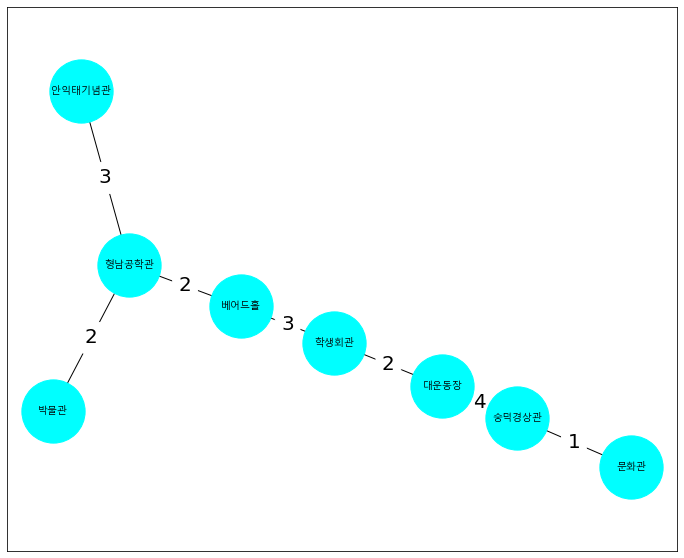

In [41]:
map2= [(1, ('문화관', '숭덕경상관')),
 (2, ('대운동장', '학생회관')),
 (2, ('박물관', '형남공학관')),
 (2, ('베어드홀', '형남공학관')),
 (3, ('베어드홀', '학생회관')),
 (3, ('안익태기념관', '형남공학관')),
 (4, ('대운동장', '숭덕경상관'))]
G1 =nx.Graph()
G1.add_weighted_edges_from([('문화관', '숭덕경상관',1),('대운동장', '학생회관',2),('박물관', '형남공학관',2),('베어드홀', '형남공학관',2),('베어드홀', '학생회관',3),('안익태기념관', '형남공학관',3),('대운동장', '숭덕경상관',4)])

draw_graph(G1)